# Quinta Atividade de Processamento Digital de Sinais - ECAC14A #
## Mateus Alexandre M. de Souza - 2021004023 ##
### Exercício 1 ###
Escrever uma função Python para realizar a Soma de Convolução usando a FFT. Esta
função deve receber duas sequencias (variáveis ndarray) e devolver uma com o resultado da
convolução. Gerar duas sequencias/sinais curtos para testar o programa, comparando seu
resultado com o da função convolve do Numpy

In [1]:
import numpy as np
from scipy.fft import fft
from scipy.fft import ifft

x1 = np.array([2,5,4])
x2 = np.array([7,3,1,9])

def convolveSum(x1, x2):
    n1 = len(x1)
    n2 = len(x2)
    x1 = np.append(x1, np.zeros((n2-1,1)))
    x2 = np.append(x2, np.zeros((n1-1,1)))
    y = fft(x1)*fft(x2)
    y = ifft(y).real
    print(y)

convolveSum(x1,x2)

print(np.convolve(x1, x2))

[14. 41. 45. 35. 49. 36.]
[14 41 45 35 49 36]


### Exercício 2 ###
Escrever uma função Python para realizar a STFT usando a FFT. Esta função deve receber
um sinal, sua frequência de amostragem e o tamanho da janela da STFT, e deve devolver
uma sequência com os intervalos de tempo, uma com as bandas de frequência e uma matriz
com a DFT dos segmentos/janelas onde cada coluna representa uma banda de frequência e
cada linha representa um intervalo de tempo. Usar as instruções abaixo para gerar um sinal
de teste para verificar o funcionamento de sua função.

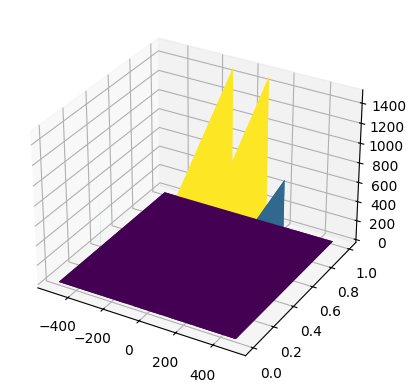

In [2]:
import matplotlib.pyplot as plt

Ts = 1/1000  
t1 = np.arange(0, 1, Ts)
pi = np.pi

s1 = np.cos(2*pi*50*t1) + 2*np.cos(2*pi*250*t1)
s2 = 3*np.cos(2*pi*100*t1) + np.cos(2*pi*200*t1)
s3 = 2*np.cos(2*pi*150*t1) + np.cos(2*pi*20*t1)
s = np.append(s1, s2)
s = np.append(s, s3)

t = np.arange(0, 3, Ts)

window_size = 1000 

def shortTimeFT(s, Ts, window_size):
    matrix = []
    time_intervals = []

    for i in range(0, len(s) - window_size, window_size): 
        sw = s[i:i+window_size]
        S_w = fft(sw)
        matrix.append(S_w)
        time_intervals.append(i * Ts)
    
    matrix = np.array(matrix)
    freq = np.fft.fftfreq(window_size, Ts)
    
    return np.array(time_intervals), freq, matrix

time_intervals, freq, S = shortTimeFT(s, Ts, window_size)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(freq, time_intervals)
Z = np.abs(S)

ax.plot_surface(X, Y, Z, linewidth=2, cmap='viridis')

plt.show()


### Exercício 3 ###
Utilizar a função criada no item 2, que realiza a STFT, para gerar o espectro de amplitude
do sinal DTMF selecionado do exercício 2 da atividade 4. Plotar o gráfico na forma de um
espectrograma, utilizando as instruções de geração de gráfico 3D.

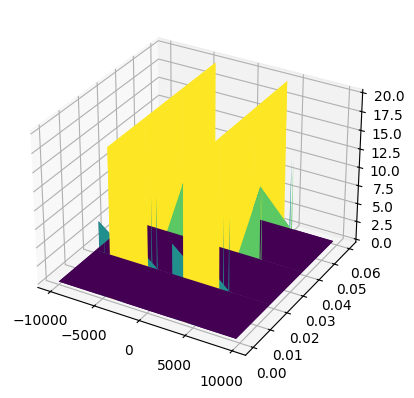

In [3]:
with open('DTMF-s3.npy', 'rb') as f:
    Ts3 = np.load(f) 
    s3 = np.load(f)   

window_size = 400

def shortTimeFT(s, Ts, window_size):
    matrix = []
    time_intervals = []

    for i in range(0, len(s) - window_size, window_size):  
        sw = s[i:i+window_size]
        S_w = fft(sw)
        matrix.append(S_w)
        time_intervals.append(i * Ts)
    
    matrix = np.array(matrix)
    freq = np.fft.fftfreq(window_size, Ts)
    
    return np.array(time_intervals), freq, matrix

time_intervals, freq, S = shortTimeFT(s3, Ts3, window_size)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(freq, time_intervals)
Z = np.abs(S)

ax.plot_surface(X, Y, Z, linewidth=2, cmap='viridis')

plt.show()
